# Population Dynamics

This is part of Nathaniel Virgo's lectures on population dynamics, as part of the ELSI course.

These notes roughly follow the first few chapters of Hofbauer and Sigmund's book *Evolutionary Games and Population Dynamics*.

---

If you're viewing this online you can edit the document and run Python code. Your edits will only exist in your browser's cache - other people can't see them.

It's better to use a recent version of Chrome or Firefox when viewing this notebook. If you have problems, try using Chrome.

To run Python code, hold shift and press enter. If you run each cell in sequence, it should re-create all the graphs. If you get an error it probably means you have to run one of the other cells first.

---

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['figure.figsize'] = [12, 6]

In [29]:
# a convenient function for plotting - put the axes at x=0, y=0.
def center_axes():
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')

# Exponential growth

The simplest model of an ecological population: each member has $r$ offspring per unit time and a probability $s$ of dying per unit time. 

This gives the equation
$$
\frac{\mathrm{d}x}{\mathrm{d}t} = (r-s)x.
$$

The parameter $r$ is called the **growth rate** and $s$ is the **death rate**.

This equation has solutions given by
$$
x(t) = x_0 e^{(r-s)t}.
$$

Let's plot this.

In [30]:
x0 = 0.1          # initial x value
r = 1             # growth rate
s = 0.1           # death rate

max_T = 5         # integrate from 0 to max_T
tsteps = 1000     # number of time steps for plotting

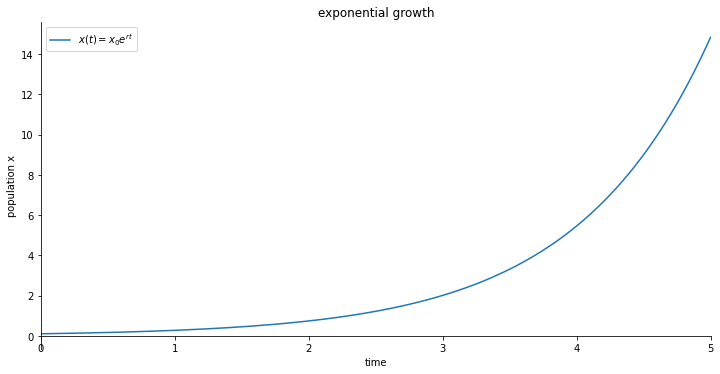

In [31]:
t = np.linspace(0, max_T, tsteps)
x = x0*np.exp(r*t)

plt.title("exponential growth")
plt.ylabel("population x")
plt.xlabel("time")
plt.plot(t,x, label="$x(t) = x_0e^{rt}$")
plt.xlim(0,max_T)
center_axes()
plt.legend()
plt.show()

---
**Try increasing `max_T` from 5 to 15.** Note the scale on the x axis.

**What happens if $s>r$, so that $r-s$ is negative?** The result is called **exponential decay.** Can you give a biological interpretation?

---

# logistic growth

In nature, exponential growth never continues forever.

An alternative model is **logistic growth**, given by
$$
\frac{\mathrm{d}x}{\mathrm{d}t} = rx\left(1 - \frac{x}{K}\right)
$$

In addition to the growth rate $r$ we have a new parameter $K$ called the **carrying capacity**.

It's solution is given by

$$
x(t) = \frac{Kx_0e^{rt}}{K+x_0(e^{rt}-1)}
$$

(eq. 1.5 in the book)

let's plot it:

In [32]:
x0 = 0.1        # initial x value
r = 1           # growth rate
K = 10          # carrying capacity

max_T = 15      # integrate from 0 to max_T
tsteps = 1000   # number of time steps for plotting

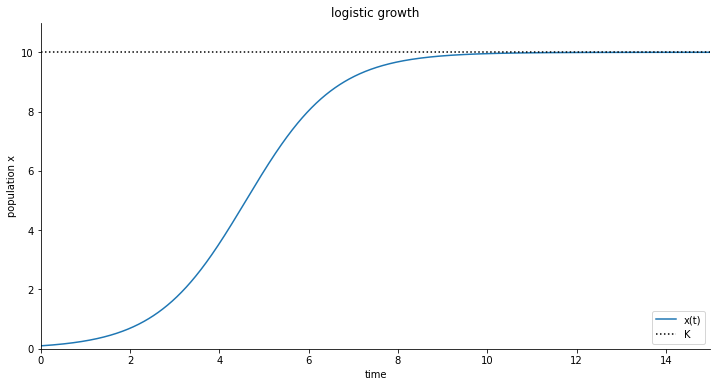

In [33]:
t = np.linspace(0, max_T, tsteps)
x = K*x0*np.exp(r*t)/(K + x0*(np.exp(r*t)-1))

k = K*np.ones_like(t) # just for plotting

plt.title("logistic growth")
plt.ylabel("population x")
plt.xlabel("time")
plt.plot(t,x, label="x(t)")
plt.plot(t,k,"k:", label="K")
plt.xlim(0,max_T)
plt.ylim(0,max(K,x0)+1)
center_axes()
plt.legend()
plt.show()

---

**Try changing $x_0$ to something greater than 10.**

---

What does logistic growth look like compared to exponential growth?

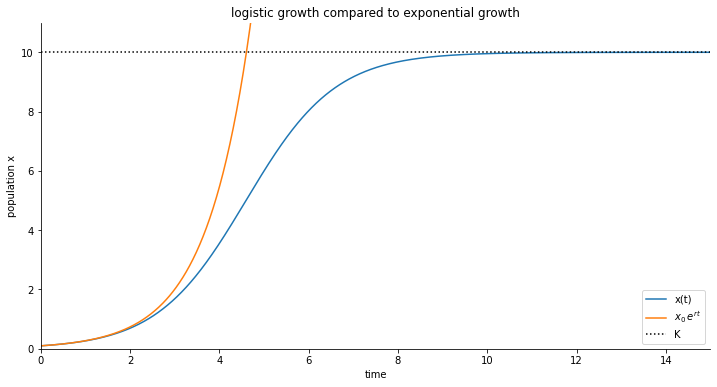

In [34]:
max_T = 15      # integrate from 0 to max_T

g = x0*np.exp(r*t)

plt.title("logistic growth compared to exponential growth")
plt.ylabel("population x")
plt.xlabel("time")

plt.plot(t,x, label="x(t)")
plt.plot(t,g, label="$x_0\,e^{rt}$")
plt.plot(t,k,"k:", label="K")
plt.xlim(0,max_T)
plt.ylim(0,K+1)
center_axes()
plt.legend()
plt.show()

At first they look the same, but logistic growth *saturates* as it gets closer to the carrying capacity.

---

**Try changing the parameters**, e.g.

* $x_0 = 0.001$ instead of $0.1$
* $K=5$ instead of $10$
* $r=10$ instead of $1$

what will happen if $x_0 = 0$?

---

# Lotka-Volterra equations

Let's start with the Lotka-Volterra *predator-prey* equations. (There are more general versions of the Lotka-Volterra equations.) These are

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a-by)
$$

$$
\frac{\mathrm{d}y}{\mathrm{d}t} = y(-c + dx)
$$

(equation 2.1 in the book.) That's two simultaneous ordinary differential equations. The parameters are all positive, $a>0, b>0, c>0, d>0$.

To understand this equation note the following:

 * if $y=0$ then it becomes $\mathrm{d}x/\mathrm{d}t = ax$, so $x$ will increase exponentially without $y$
 
 * if $x=0$ then it becomes $\mathrm{d}y/\mathrm{d}t = -cy$, so $y$ will *decrease* exponentially without $x$

 * but because $b>0$, increasing $y$ causes $x$'s growth rate to decrease
  
 * and because $d>0$, increasing $x$ causes $y$'s growth rate to increase

There is no analytical solution for this either, so we have to solve numerically.

In [35]:
def lotka_volterra(t, state, a, b, c, d):
    x, y = state
    dx = x*(a-b*y)
    dy = y*(-c+d*x)
    return [dx,dy]

a = 1
b = 1
c = 0.2
d = 0.2

t_span = (0.0,30.0)
t_points = np.linspace(t_span[0], t_span[1], 1000)

initial_state = [0.4, 0.2]

result = solve_ivp(lotka_volterra, t_span, initial_state, t_eval=t_points, args=(a,b,c,d), method='RK45', rtol=1e-10, atol=1e-10)

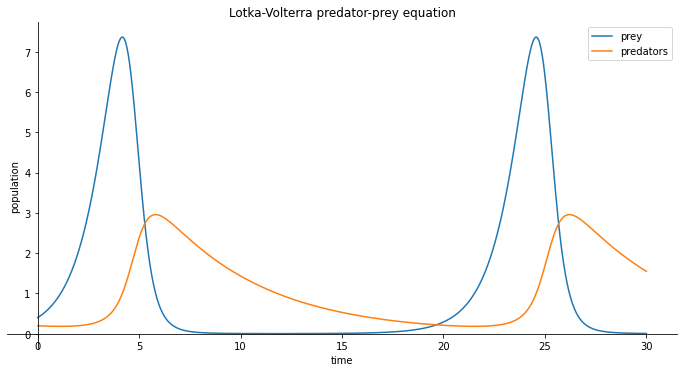

In [36]:
plt.title("Lotka-Volterra predator-prey equation")
plt.ylabel("population")
plt.xlabel("time")

plt.plot(result.t, result.y[0,:], label="prey")
plt.plot(result.t, result.y[1,:], label="predators")
center_axes()
plt.legend()
plt.show()

Interpretation of this plot:

 * at first there are not very many predators, so the prey start to multiply
 * but then at around t=3 there are lots of prey, so the predators start to multiply quickly
 * by about t=4.5 the predator population is so high the prey population starts to decrease
 * by about t=7 the prey population has fallen so far that the predators start to die off
 * at about t=12 there are so few predators that the prey starts to increase again
 * then the whole cycle can repeat



Now let's try plotting predators on the y axis and prey on the x axis:

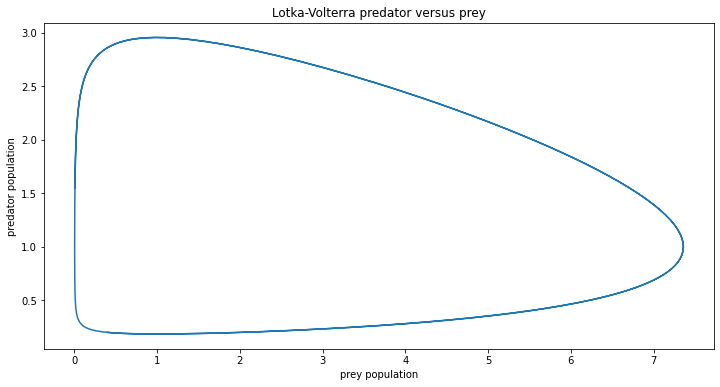

In [37]:
plt.title("Lotka-Volterra predator versus prey")
plt.ylabel("predator population")
plt.xlabel("prey population")

plt.plot(result.y[0,:], result.y[1,:])
plt.show()

Over time, the system moves around this curve. See the book (fig. 2.1) for how this looks when we change the initial populations.

Now let's improve this plot by adding the **isoclines**. These are the lines $\frac{\mathrm{d}x}{\mathrm{d}t} = 0$ and $\frac{\mathrm{d}y}{\mathrm{d}t} = 0$. We can calculate them like this:

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a-by) = 0 
\,\,\Longrightarrow\,\, a - by = 0 
\,\,\Longrightarrow\,\, y = \frac{a}{b} 
\qquad\text{(assuming $x>0$)}
$$

$$
\frac{\mathrm{d}y}{\mathrm{d}t} = y(-c + dx) = 0 
\,\,\Longrightarrow\,\, -c + dx = 0
\,\,\Longrightarrow\,\, x = c/d
\qquad\text{(assuming $y>0$)}
$$

The resulting plot is called a **phase portrait**.

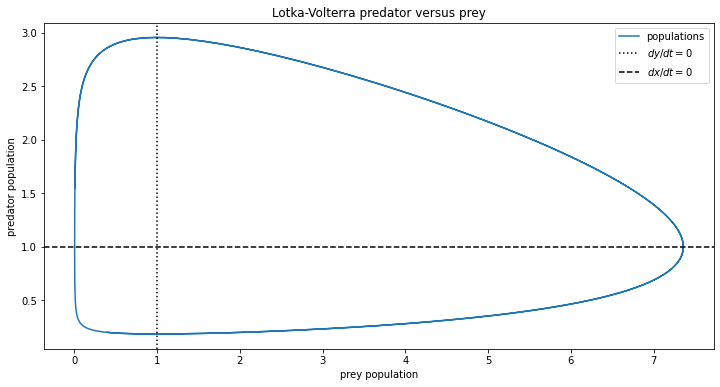

In [38]:
plt.title("Lotka-Volterra predator versus prey")
plt.ylabel("predator population")
plt.xlabel("prey population")

plt.plot(result.y[0,:], result.y[1,:],label="populations")
plt.axvline(x=c/d, ls=":", color='k', label="$dy/dt=0$")
plt.axhline(y=a/b, ls="--", color='k', label="$dx/dt=0$")
plt.legend()
plt.show()

Notice that the curve passes vertically through the dashed line and horizontally through the dotted line. This will always be the case for isoclines.

**Disclaimer**: this version of the Lotka-Volterra predator-prey equations are kind of an unrealistic model. In nature we *do* see oscillations like this, but you have to add more terms into the equations to really model them properly. The reasons are explained in chapter 4 of the book, but they are a bit beyond the scope of this lecture.

# Adding intraspecific competition terms

In the Lotka-Volterra predator-prey equations above, if we set $y=0$ then the equations become

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = ax
$$

So if there are no predators then the prey will grow exponentially, without saturating.

This is unrealistic, so to fix it we can add a new term. Instead of 

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a-by)
$$
$$
\frac{\mathrm{d}y}{\mathrm{d}t} = y(-c + dx)
$$

we now have

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a-by - ex) \\[1em]
\frac{\mathrm{d}y}{\mathrm{d}t} = y(-c + dx).
$$

Now when $y=0$ it becomes

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a - ex).
$$

This is logistic growth, with $r=a$ and $K = a/e$.

 * Check: $
\frac{\mathrm{d}x}{\mathrm{d}t} = rx\left(1 - \frac{x}{K}\right) = \frac{\mathrm{d}x}{\mathrm{d}t} = ax\left(1 - \frac{x}{a/e}\right) = ax\left(1 - \frac{ex}{a}\right) = x(a - ex).
$

So without predators the prey population will saturate instead of growing forever.

This extra term is called an **intraspecific competition** term. ("Intraspecific" means "within a species".)

We can also add an intraspecific term to the predators, so that the equations become

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a-by - ex) \\[1em]
\frac{\mathrm{d}y}{\mathrm{d}t} = y(-c + dx - fy).
$$

Let's solve them numerically.

In [39]:
def lotka_volterra_2(t, state, a, b, c, d, e, f):
    x, y = state
    dx = x*( a - b*y - e*x)
    dy = y*(-c + d*x - f*y)
    return [dx,dy]

a = 1
b = 1
c = 0.2
d = 0.2
e = 0.05
f = 0.05

t_span = (0.0,80.0)
t_points = np.linspace(t_span[0], t_span[1], 1000)

initial_state = [1, 1]

result_2 = solve_ivp(lotka_volterra_2, t_span, initial_state, t_eval=t_points, args=(a,b,c,d,e,f), method='RK45', rtol=1e-10, atol=1e-10)

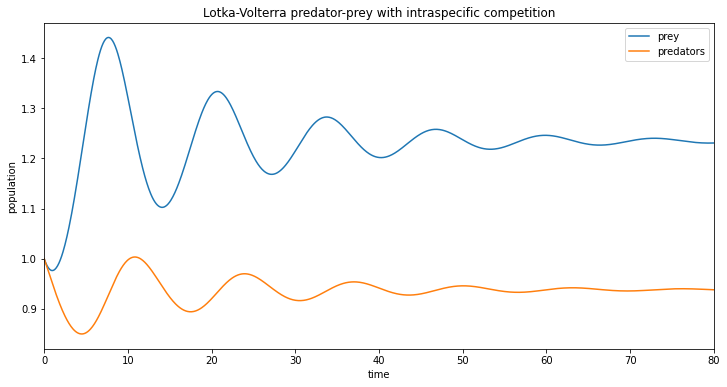

In [40]:
plt.title("Lotka-Volterra predator-prey with intraspecific competition")
plt.ylabel("population")
plt.xlabel("time")

plt.plot(result_2.t, result_2.y[0,:], label="prey")
plt.plot(result_2.t, result_2.y[1,:], label="predators")
plt.xlim(*t_span)
plt.legend()
plt.show()

The oscillations die out. This phenomenon is called **damping**.

Now let's make the phase portrait. First we calculate the isoclines.

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a-by - ex) = 0
$$
$$
\,\,\Longrightarrow\,\, a-by-ex = 0
$$
$$
\,\,\Longrightarrow\,\, y = \frac{a-ex}{b}
$$
(assuming $x>0$)

$$
\frac{\mathrm{d}y}{\mathrm{d}t} = y(-c + dx - fy) = 0
$$
$$
\,\,\Longrightarrow\,\, -c + dx - fy = 0
$$
$$
\,\,\Longrightarrow\,\, y = \frac{-c+dx}{f}
$$
(assuming $y>0$)


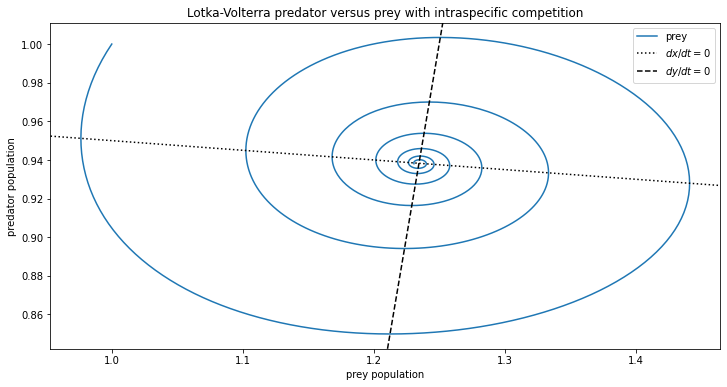

In [41]:
plt.title("Lotka-Volterra predator versus prey with intraspecific competition")
plt.ylabel("predator population")
plt.xlabel("prey population")

# first the trajectory
plt.plot(result_2.y[0,:], result_2.y[1,:], label="prey")
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# x isocline
x = np.array([0.1,20])
y = (a-e*x)/b 
plt.plot(x,y,'k:',label="$dx/dt=0$",scalex=False, scaley=False)

# y isocline
x = np.array([0.1,20])
y = (-c+d*x)/f 
plt.plot(x,y,'k--',label="$dy/dt=0$",scalex=False, scaley=False)

#center_axes()
plt.legend()
plt.show()

let's try a different initial condition

In [42]:
initial_state = [20, 0.001]

result_2 = solve_ivp(lotka_volterra_2, t_span, initial_state, t_eval=t_points, args=(a,b,c,d,e,f), method='RK45', rtol=1e-10, atol=1e-10)

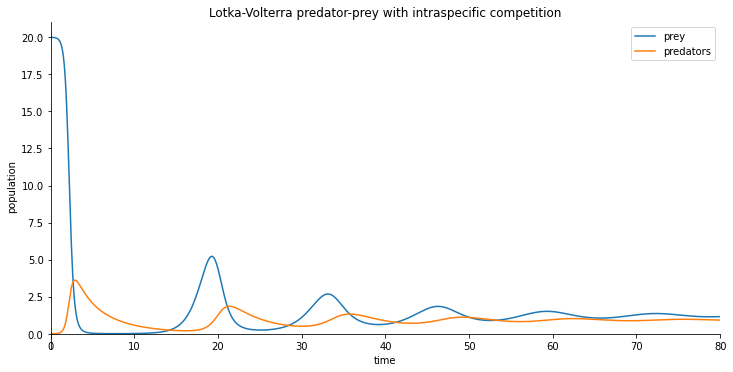

In [43]:
plt.title("Lotka-Volterra predator-prey with intraspecific competition")
plt.ylabel("population")
plt.xlabel("time")

plt.plot(result_2.t, result_2.y[0,:], label="prey")
plt.plot(result_2.t, result_2.y[1,:], label="predators")
plt.xlim(*t_span)
center_axes()
plt.legend()
plt.show()

a zoomed-in version of that last plot:

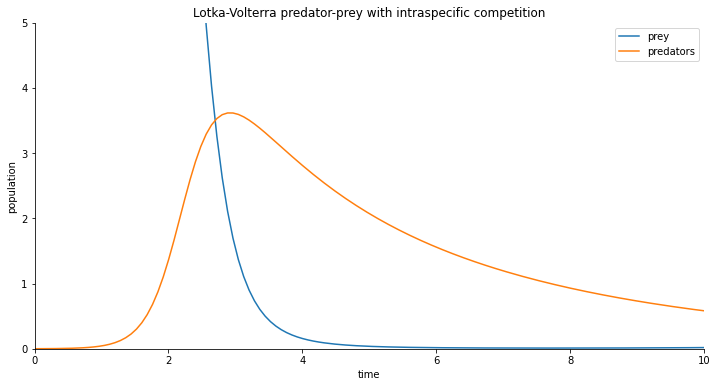

In [44]:
plt.title("Lotka-Volterra predator-prey with intraspecific competition")
plt.ylabel("population")
plt.xlabel("time")

plt.plot(result_2.t, result_2.y[0,:], label="prey")
plt.plot(result_2.t, result_2.y[1,:], label="predators")
plt.xlim(0,10)
plt.ylim(0,5)
center_axes()
plt.legend()
plt.show()


The phase portrait:

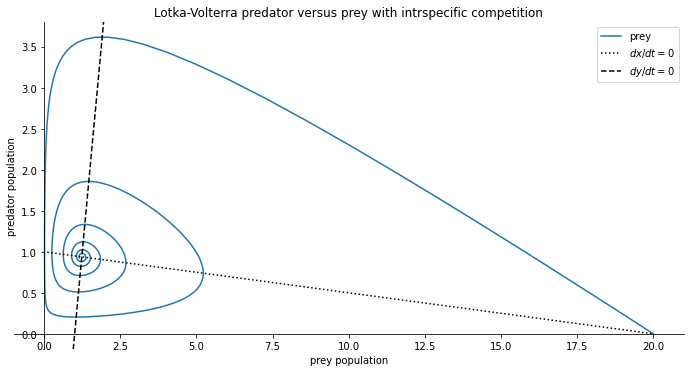

In [45]:
plt.title("Lotka-Volterra predator versus prey with intrspecific competition")
plt.ylabel("predator population")
plt.xlabel("prey population")

plt.plot(result_2.y[0,:], result_2.y[1,:], label="prey")

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# x isocline
x = np.array([0.1,20])
y = (a-e*x)/b 
plt.plot(x,y,'k:',label="$dx/dt=0$",scalex=False, scaley=False)

# y isocline
x = np.array([0.1,20])
y = (-c+d*x)/f 
plt.plot(x,y,'k--',label="$dy/dt=0$",scalex=False, scaley=False)


center_axes()
plt.legend()
plt.show()

The following was a homework last year, but this year the homework is different.

The code in the following cell will solve the Lotka-Volterra equations with intraspecific competition terms and create both plots. (The trajectories and the phase portrait.)

### Task 1.

Explore the effects of the initial conditions, i.e. the variables `initial_x` and `initial_y` below. How do the initial conditions affect the dynamics? Can you find initial conditions where the prey and/or predator populations crash almost to zero after the predators are introduced? Explain your answer (1-2 paragraphs). Feel free to include copies of the plots in your writeup.

### Task 2.

What about the parameters a, b, c, d, e, f? Briefly explore the effect they have on the dynamics. (You don't have be systematic, just try to get a feel for it.) Can you find parameter settings where the oscillations die out very quickly, or where they last a long time before dying out? Explain your answer and feel free to include plots. (1-2 paragraphs.)


as a reminder, the equations are:

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a-by - ex) \\[1em]
\frac{\mathrm{d}y}{\mathrm{d}t} = y(-c + dx - fy).
$$


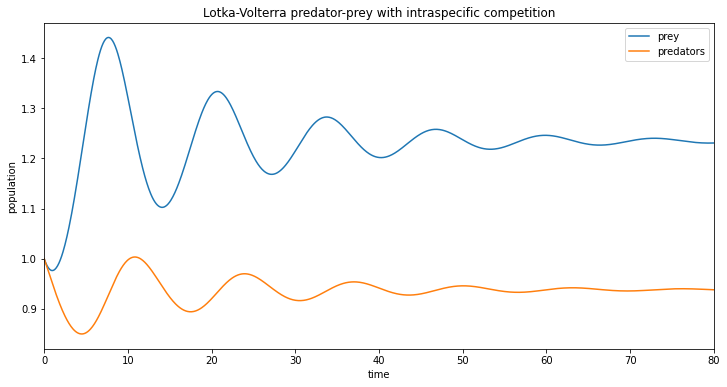

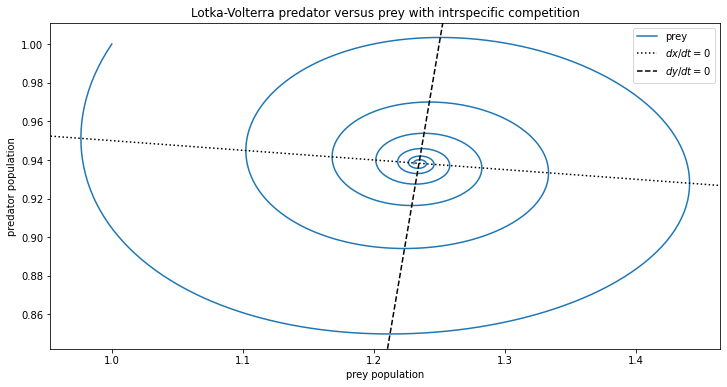

In [46]:
# parameters of the Lotka-Volterra equations (for predator-prey with intraspecific competition)

a = 1               # growth rate of prey
b = 1               # rate at which predators decrease the prey population

c = 0.2             # death rate of predators
d = 0.2             # rate at which prey increase the predator population

e = 0.05            # intraspecific competition for prey
f = 0.05            # intraspecific competition for predators

max_time = 80.0     # simulate until this time

initial_x = 1       # initial population of prey
initial_y = 1       # initial population of predators


# you don't need to change anything below this line.
# --------------------------------------------------------------------------------------------------------

def lotka_volterra_2(t, state, a, b, c, d, e, f):
    x, y = state
    dx = x*( a - b*y - e*x)
    dy = y*(-c + d*x - f*y)
    return [dx,dy]


t_span = (0.0,max_time)
t_points = np.linspace(t_span[0], t_span[1], 1000)

initial_state = [1, 1]

result_2 = solve_ivp(lotka_volterra_2, t_span, initial_state, t_eval=t_points, args=(a,b,c,d,e,f), method='RK45', rtol=1e-10, atol=1e-10)


# first plot: populations over time

plt.title("Lotka-Volterra predator-prey with intraspecific competition")
plt.ylabel("population")
plt.xlabel("time")

plt.plot(result_2.t, result_2.y[0,:], label="prey")
plt.plot(result_2.t, result_2.y[1,:], label="predators")
plt.xlim(*t_span)
#center_axes()
plt.legend()
plt.show()

# second plot: phase diagram

plt.title("Lotka-Volterra predator versus prey with intrspecific competition")
plt.ylabel("predator population")
plt.xlabel("prey population")

plt.plot(result_2.y[0,:], result_2.y[1,:], label="prey")

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# x isocline
x = np.array([0.1,20])
y = (a-e*x)/b 
plt.plot(x,y,'k:',label="$dx/dt=0$",scalex=False, scaley=False)

# y isocline
x = np.array([0.1,20])
y = (-c+d*x)/f 
plt.plot(x,y,'k--',label="$dy/dt=0$",scalex=False, scaley=False)

#center_axes()
plt.legend()
plt.show()

# Lotka-Volterra competition equations

In the predator-prey system we had the following relationships:

 * Prey can reproduce on their own without predators
 * Predators cannot reproduce without prey
 * Prey have a *positive* effect on predators
 * Predators have a *negative* effect on prey
 
Often we want a more symmetric relationship that looks like this:
 
 * Species $X$ can reproduce on their own without species $Y$
 * and also species $Y$ can reproduce on their own without species $X$
 * Species $Y$ has a *negative* effect on species $X$
 * and also species $X$ has a *negative* effect on species $Y$
  
Think of two plants growing in the same place. Both of them can grow by themselves, but they compete for space (and light, water, nutrients etc.)

We can model this with the same equations as above, except that we change the signs of some of the parameters. We keep the intraspecific competition terms, because otherwise our popoulations could grow exponentially forever.

This gives the equations (eq. 3.8 in the book)

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = x(a - bx - cy) \\[1em]
\frac{\mathrm{d}y}{\mathrm{d}t} = y(d - ex - fy)
$$

where now we interpret the parameters as follows:

 * $a$ - intrinsic growth rate of species $X$
 * $b$ - intraspecific competition term for species $X$
 * $c$ - the negative effect of species $Y$ on species $X$

 * $d$ - intrinsic growth rate of species $Y$
 * $e$ - the negative effect of species $X$ on species $Y$
 * $f$ - intraspecific competition term for species $Y$

The parameters $c$ and $e$ are called **interspecific competition** terms. ("inter" means "between" while "intra" means "within".)

Now the isoclines are given by

$$
a- bx - cy = 0 \qquad\text{or}\qquad y = \frac{a-bx}{c}%x = \frac{cy-a}{b}
$$

and

$$
d - ex - fy \qquad\text{or}\qquad y = \frac{d-ex}{f}%x = \frac{fy-d}{e}
$$

Now let's plot it. The behaviour depends on the parameters - I'll write a function so we can play with the parameters

In [47]:
# helper function
def rand_range(low, hi):
    return np.random.random()*(hi-low) + low

# a version that's biased toward the low end, which makes better plots
def rand_range_biased(low, hi):
    return np.random.random()*(np.random.random()*0.5+0.5)*(hi-low) + low


def plot_competition(a, b, c, d, e, f, x_range, y_range):
    # a, b, c, d, e, f are the parameters
    # x_range and y_range should be of the form [min_x, max_x] and [min_y, max_y].
    
    for i in range(15):
        # solve and plot the equations from a few random starting points
        
        def lotka_volterra_competition(t, state):
            x, y = state
            dx = x*(a - b*x - c*y)
            dy = y*(d - e*x - f*y)
            return [dx,dy]

        t_span = (0.0,80.0)
        t_points = np.linspace(t_span[0], t_span[1], 1000)

        initial_state = [rand_range_biased(*x_range), rand_range_biased(*y_range)]

        result = solve_ivp(lotka_volterra_competition, t_span, initial_state, t_eval=t_points, method='RK45', rtol=1e-10, atol=1e-10)
        
        plt.plot(result.y[0,:], result.y[1,:])
    

    # x isocline
    x = np.array([0.1,20])
    y = (a-b*x)/c 
    plt.plot(x,y,'k:',label="$dx/dt=0$",scalex=False, scaley=False)

    # y isocline
    x = np.array([0.1,20])
    y = (d-e*x)/f
    plt.plot(x,y,'k--',label="$dy/dt=0$",scalex=False, scaley=False)

    plt.xlabel("Species $X$")
    plt.ylabel("Species $Y$")
    
    plt.xlim(x_range)
    plt.ylim(y_range)

    center_axes()
    plt.legend()
    plt.show()

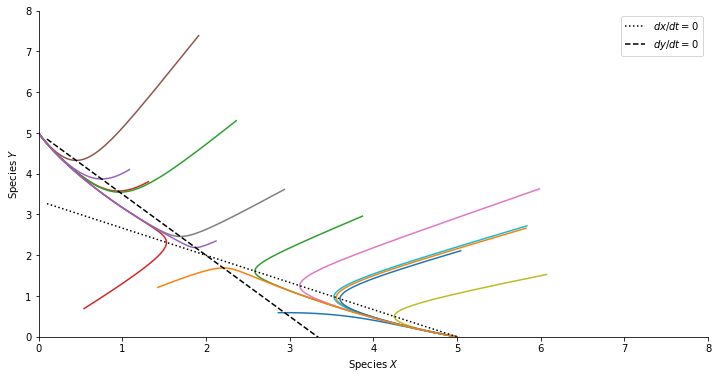

In [48]:
# intrinsic growth rates
a = 1
d = 1 

# intraspecific competition
b = 0.2
f = 0.2

# interspecific competition - try changing these to more or less than 0.2
c = 0.3
e = 0.3

plot_competition(a, b, c, d, e, f, [0,8], [0,8])

# What about cooperation?

We've looked at two different relationship between two species:

 * **predator-prey** had a *postitive* effect of $X$ on $Y$ but a *negative* effect of $Y$ on $X$
 * **competition** had a *negative* effect of $X$ on $Y$ and a *negative* effect of $Y$ on $X$
 
Is there a case where both species have a *positive* effect on each other.

Yes! This relationship is called *mutualism*. It is very important in nature! E.g. think of insects polenating flowers.

Unfortunately though, the Lotka-Volterra equations are not very good for modeling mutualism. If you try to put positive interactions in both directions, the populations can keep growing forever. To model it properly you need different equations with more nonlinear terms, so we skip it.

# More than two species

You might have noticed that when we write the Lotka-Volterra equations, the part inside the brackets is a linear function.

This lets us generalise the Lotka-Volterra equations to more than two species. We can write them as

$$
\frac{\mathrm{d}x_i}{\mathrm{d}t} = x_i f_i,
$$

where 

$$
\mathbf{f} = \mathbf{b} + A\mathbf{x}.
$$

Here I'm using bold for vectors, and $A$ is a matrix. The elements of $\mathbf{b}$ are the intrinsic growth or death rates, depending on whether they're positive or negative. The only restriction on elements of $A$ is that if $A_{ij}>0$ then we should have $A_{ji}\le 0$. (You can't have positive terms in both directions, as mentioned above.)

I won't explain this in detail, but the book has a lot more information if you're interested.

All I want to do here is to demonstrate modeling a **food web**. 

In this case we have a situation where

 * species $X$ can grow by itself (e.g. it's a plant)
 * species $Y$ eats species $X$ (so $X$ and $Y$ are a predator-prey system)
 * species $Z$ eats both species $Y$ and species $X$
 
E.g. species $X$ could be a plant, species $Y$ a herbivore (animal that eats plants) and species $Z$ could be an omnivore (animal that eats both plants and other animals). We call species $X$ a **producer** (because it produces energy) and we call $Y$ and $Z$ **consumers**.

 
We can do that by choosing

$$\mathbf{b} = \begin{pmatrix}+\\-\\-\end{pmatrix},
\qquad
A = \begin{pmatrix}- & - & -\\+ & 0 & -\\+ & + & 0\end{pmatrix},
$$
where "$-$" means any negative number and "$+$" means any positive one. ($a_{22}$ and $a_{33}$ are zero because we don't include intraspecific terms for the consumers.)

The main reason I want to do this is to show something that can't happen with only two species.

In [76]:
# parameters taken from 

# Omnivory Creates Chaos in Simple Food Web Models
# Kumi Tanabe and Toshiyuki Namba
# Ecology Vol. 86, No. 12 (Dec., 2005), pp. 3411-3414 (4 pages)
# https://www.jstor.org/stable/3450749


# growth rate of primary producer
b1 = 5

# death rate of consumers
b2 = -1
b3 = -1.2

# intraspecific competition on producers only
a11 = -0.4

# interactions between species 1 and 2
a12 = -1
a21 = 1

# interactions between species 2 and 3
a13 = -15
a31 = 0.1

# interactions between species 2 and 3
a23 = -1
a32 = 1


def lotka_volterra_three_species(t, state):
    x1, x2, x3 = state

    dx1 = x1*(b1 + a11*x1 + a12*x2 + a13*x3 )
    dx2 = x2*(b2 + a21*x1          + a23*x3 )
    dx3 = x3*(b3 + a31*x1 + a32*x2          )
    
    return [dx1,dx2,dx3]

t_span = (0.0,1000)
t_points = np.linspace(t_span[0], t_span[1], 10000)

initial_state = [5,5,5]

result_3 = solve_ivp(lotka_volterra_three_species, t_span, initial_state, t_eval=t_points, method='RK45', rtol=1e-10, atol=1e-10)

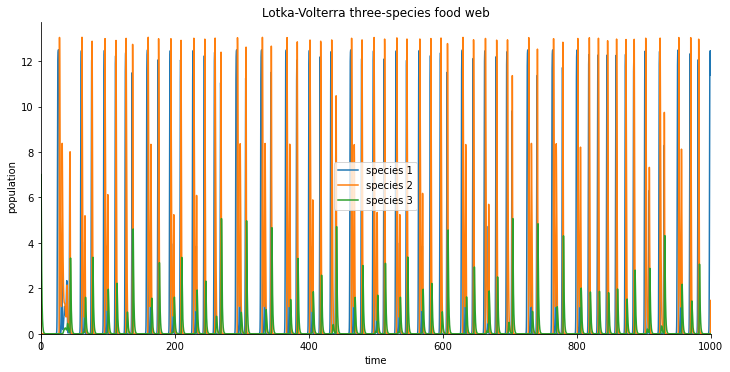

In [77]:
plt.title("Lotka-Volterra three-species food web")
plt.ylabel("population")
plt.xlabel("time")

plt.plot(result_3.t, result_3.y[0,:], label="species 1")
plt.plot(result_3.t, result_3.y[1,:], label="species 2")
plt.plot(result_3.t, result_3.y[2,:], label="species 3")
plt.xlim(*t_span)
center_axes()
plt.legend()
plt.show()


Try increasing the time span from 100 to 500 or so.

This "bursty" pattern continues forever, but it can be proved that it never quite repeats.

This is another example of **chaos**.

In continuous systems, chaos can't happen if you only have species, so this is the simplest kind of chaotic food web model.

/var/folders/4d/gxbdyms95xj55j13wgnn2_bw0000gn/T/ipykernel_59330/1226817769.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


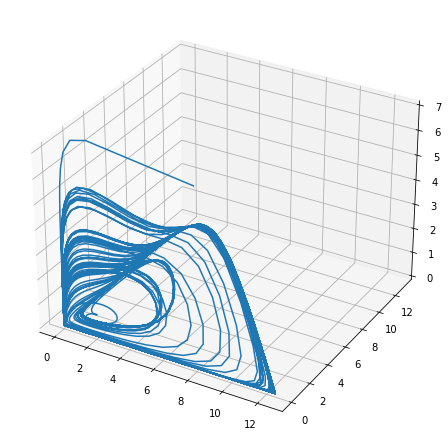

In [78]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = Axes3D(fig)

ax.plot(result_3.y[0,:],result_3.y[1,:],result_3.y[2,:])
#center_axes()
#plt.legend()
plt.show()


In [63]:
from mpl_toolkits.mplot3d import Axes3D 

In [51]:
# parameters taken from 

# Omnivory Creates Chaos in Simple Food Web Models
# Kumi Tanabe and Toshiyuki Namba
# Ecology Vol. 86, No. 12 (Dec., 2005), pp. 3411-3414 (4 pages)
# https://www.jstor.org/stable/3450749


# growth rate of primary producer
b1 = 3

# death rate of consumers
b2 = -1
b3 = -1.2

# intraspecific competition on producers only
a11 = -1

# interactions between species 1 and 2
a12 = -4
a21 = 1

# interactions between species 2 and 3
a13 = -15
a31 = 0.1

# interactions between species 2 and 3
a23 = -0.5
a32 = 1


def lotka_volterra_three_species(t, state):
    x1, x2, x3 = state

    dx1 = x1*(b1 + a11*x1 + a12*x2 + a13*x3 )
    dx2 = x2*(b2 + a21*x1          + a23*x3 )
    dx3 = x3*(b3 + a31*x1 + a32*x2          )
    
    return [dx1,dx2,dx3]

t_span = (0.0,200)
t_points = np.linspace(t_span[0], t_span[1], 1000)

initial_state = [5,5,5]

result_3 = solve_ivp(lotka_volterra_three_species, t_span, initial_state, t_eval=t_points, method='RK45', rtol=1e-10, atol=1e-10)

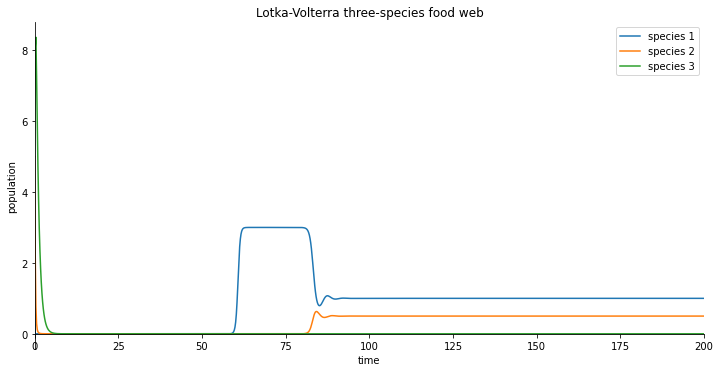

In [52]:
plt.title("Lotka-Volterra three-species food web")
plt.ylabel("population")
plt.xlabel("time")

plt.plot(result_3.t, result_3.y[0,:], label="species 1")
plt.plot(result_3.t, result_3.y[1,:], label="species 2")
plt.plot(result_3.t, result_3.y[2,:], label="species 3")
plt.xlim(*t_span)
center_axes()
plt.legend()
plt.show()

# Bonus material: what happens in discrete time?

We won't cover this in class, but if you're interested in chaos you can take a look.

In continuous time, you need at least three species for chaos to occur. But if time is discrete then one species is enough.

Let's imagine that instead of continuous time, we have discrete generations. E.g. think of a species that reproduces once per year. Then a somewhat analogous equation is

$$
x_{t+1} = R x_t \left( 1 - \frac{x_t}{K} \right)
$$

but let's set $K=1$, so it becomes

$$
x_{t+1} = R x_t \left( 1 - x_t \right)
$$

This equation is called the **Logistic map**.

There isn't an analyical solution to this one, so let's iterate it and plot it.

I'll define a function that does the iteration and plots it, so I can show you different parameter values.

In [53]:
def plot_logistic_map(x0, R, tsteps):
    
    x = np.zeros(tsteps)
    x[0] = x0
    for t in range(1,tsteps):
        x[t] = R*x[t-1]*(1-x[t-1])
    t = np.arange(0,tsteps)
    
    plt.title("iteration of logistic map")
    plt.ylabel("population x")
    plt.xlabel("time")

    plt.plot(t,x, "-bo", label="x(t)")
    plt.xlim(0,tsteps)
    plt.ylim(0,1)
    center_axes()
    plt.legend()
    plt.show()

for $R$ between 1 and 2 it behaves like the continuous time case

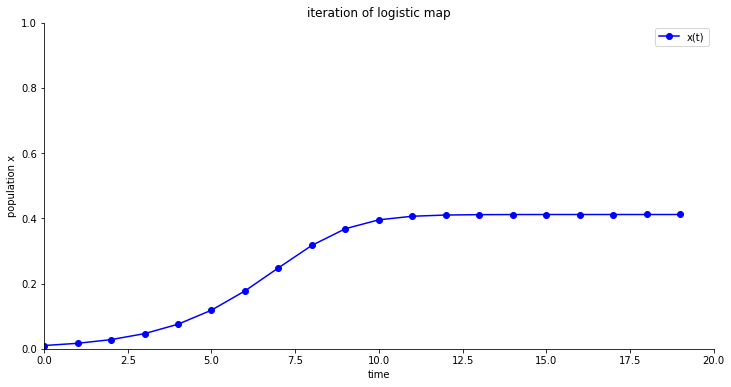

In [54]:
x0 = 0.01
R = 1.7
tsteps = 20

plot_logistic_map(x0, R, tsteps)

for $R$ between 2 and 3 something different starts to happen

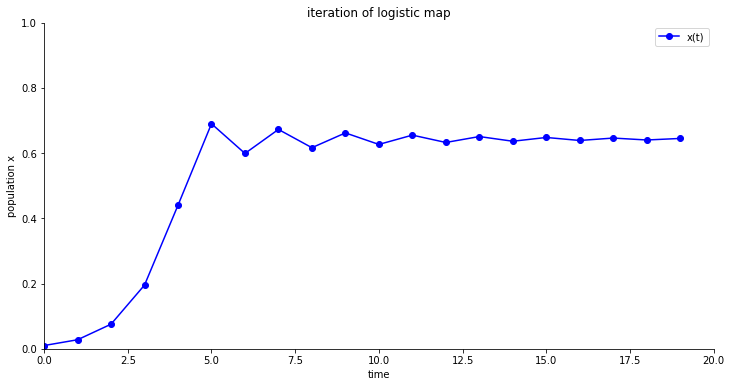

In [55]:
x0 = 0.01
R = 2.8
tsteps = 20

plot_logistic_map(x0, R, tsteps)

above 3 we get permanent oscillations

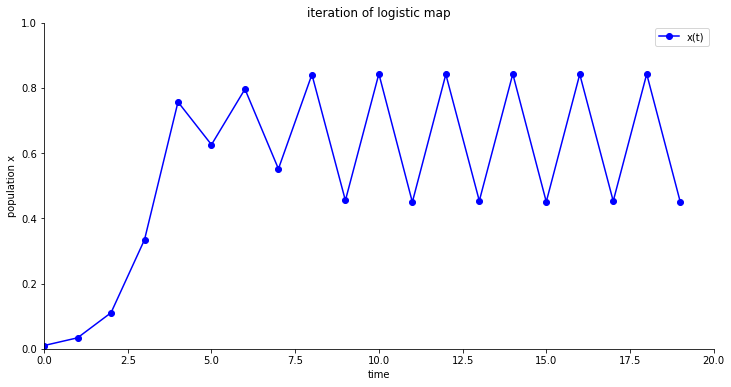

In [56]:
x0 = 0.01
R = 3.4
tsteps = 20

plot_logistic_map(x0, R, tsteps)

At higher values they become more complex

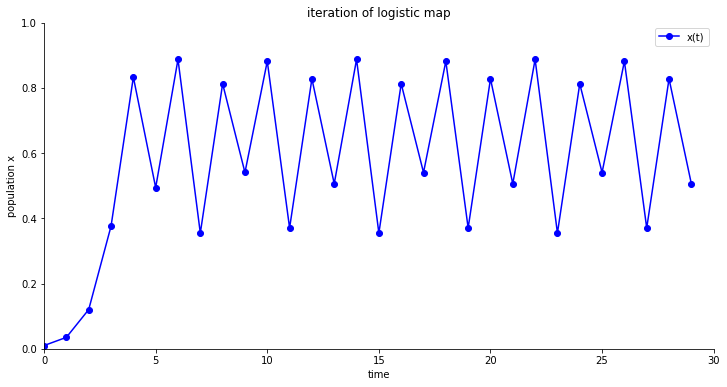

In [57]:
x0 = 0.01
R = 3.55
tsteps = 30

plot_logistic_map(x0, R, tsteps)

Above the value of $3.56995\dots$ we get **chaos** - the sequence never repeats

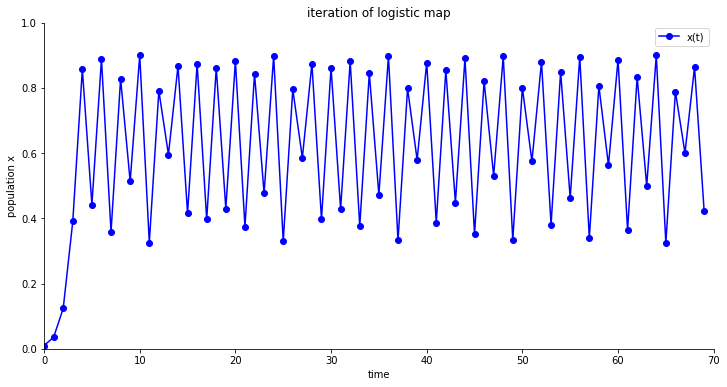

In [58]:
x0 = 0.01
R = 3.6
tsteps = 70 # try changing this to 170

plot_logistic_map(x0, R, tsteps)

The logistic map is a classic example in chaos theory and there is a *lot* more that can be said about it!

[Wikipedia](https://en.wikipedia.org/wiki/Logistic_map) is not a bad place to start for an overview. The book has some explanations of why this happens.

But for now we are really interested in the continuous time case. You can also have chaos in continuous time, but not in a one-variable case like this. (You actually need at least *three* variables for chaos in a continuous system!) So now we'll leave the logistic map and turn to another set of equations.

